![](https://www.dexerto.com/cdn-image/wp-content/uploads/2024/11/05/twitch-clarifies-sensitive-content-label-lived-experiences.jpg?width=1200&quality=75&format=auto)

The concept of streaming video games began with sites like Twitch's predecessor, Justin.tv, which launched in 2007. This was originally a platform for live video streaming, and it wasn’t dedicated solely to gaming at first. But gamers quickly adopted it, and in 2011, Twitch.tv was born as a platform specifically for video game streaming.

The Dataset is taken from https://www.kaggle.com/datasets/aayushmishra1512/twitchdata

Libraries used in project :

- Pandas : a software library written for the Python programming language for data manipulation and analysis
- Numpy : a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
- Matplotlib : a plotting library for the Python programming language and its numerical mathematics extension NumPy.
- Seaborn : a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

<div style="background-color:Purple; padding:20px; border-radius:5px;">
    <h1 style="color:white; font-weight:bold; text-align:center;">Data Preparation & Data Cleaning </h1>
</div>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.io as pio
import plotly.express as px
import random
import seaborn as sns
%matplotlib inline
import matplotlib.colors as mcolors
plt.style.use('fivethirtyeight')
pio.templates.default = "plotly_white"

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import category_encoders as ce

In [2]:
# Load the CSV file into a DataFrame
file_path = '/kaggle/input/twitchdata/twitchdata-update.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head(20)

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English
5,Asmongold,3668799075,82260,263720,42414,1563438,554201,61715781,True,False,English
6,NICKMERCS,3360675195,136275,115633,24181,4074287,1089824,46084211,True,False,English
7,Fextralife,3301867485,147885,68795,18985,508816,425468,670137548,True,False,English
8,loltyler1,2928356940,122490,89387,22381,3530767,951730,51349926,True,False,English
9,Anomaly,2865429915,92880,125408,12377,2607076,1532689,36350662,True,False,English


In [3]:
df.shape

(1000, 11)

- We have a total of 1000 rows & 11 columns.

In [4]:
df.columns

Index(['Channel', 'Watch time(Minutes)', 'Stream time(minutes)',
       'Peak viewers', 'Average viewers', 'Followers', 'Followers gained',
       'Views gained', 'Partnered', 'Mature', 'Language'],
      dtype='object')

In [5]:
print(f'---------------------------------------------------------------------------------------')
print(f'Data Size: {df.shape}')
print(f'---------------------------------------------------------------------------------------')
print(f'Data Description: {df.describe()}')
print(f'---------------------------------------------------------------------------------------')
print(f'Data Duplicates: {df.duplicated()}')
print(f'---------------------------------------------------------------------------------------')
print(f'Null values : {df.isnull().sum()}')

---------------------------------------------------------------------------------------
Data Size: (1000, 11)
---------------------------------------------------------------------------------------
Data Description:        Watch time(Minutes)  Stream time(minutes)   Peak viewers  \
count         1.000000e+03           1000.000000    1000.000000   
mean          4.184279e+08         120515.160000   37065.051000   
std           5.496355e+08          85376.201364   60314.307686   
min           1.221928e+08           3465.000000     496.000000   
25%           1.631899e+08          73758.750000    9113.750000   
50%           2.349908e+08         108240.000000   16676.000000   
75%           4.337399e+08         141843.750000   37569.750000   
max           6.196162e+09         521445.000000  639375.000000   

       Average viewers     Followers  Followers gained  Views gained  
count      1000.000000  1.000000e+03      1.000000e+03  1.000000e+03  
mean       4781.040000  5.700541e+05  

From the result shown above, we can see that :

- There are no missing values.
- No duplicates were found.

So we can preceed to the EDA & Visualization.

<div style="background-color:Purple; padding:20px; border-radius:5px;">
    <h1 style="color:white; font-weight:bold; text-align:center;">Exploratory Data Analysis & Visualization </h1>
</div>

### Stream Times of the Top 50 Streamers

In [6]:
colors = px.colors.sequential.Rainbow

def plot_px(y, title, df):
    random.shuffle(colors) # shuffle the colors for giving diferente colors to our plot every time we call our funciton
    col = df[y].sort_values(ascending=False)[:50] # Select top 50 stremers from a select column
    fig = px.bar(df, x=df.iloc[col.index]['Channel'].to_list(),
                     y=col.value_counts().index.to_list(),
                     color=df.iloc[col.index]['Language'].to_list(),
                     color_discrete_sequence = colors,
                     title=title,
                     labels={'color':'Languages'})
    fig.update_layout(xaxis=dict(title='Streamers'),
                      yaxis=dict(title=y))
    return fig.show()

In [7]:
plot_px('Stream time(minutes)', 'Top 50 Most Watched Streamers', df)

### Number of followers gained by Top 50 Streamers

In [8]:
plot_px('Followers gained', 'Top 50 Streamers by Followers gained', df)

### Average Number of Viewers for Top 50 Streamers

In [9]:
plot_px('Average viewers', 'Top 50 Streamers by Average viewers', df)

### Method to Check Stats of Individual Streamers & Check Detail of Streamer based on Language

In [10]:
def streamer(x): 
    return df.loc[df['Channel']==x]
def lang(x):
        return df[df['Language'] == x][['Channel','Followers','Partnered','Mature']].head(10)

In [11]:
streamer('summit1g')

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English


In [12]:
lang('Korean')

,Channel,Followers,Partnered,Mature
17,풍월량 (hanryang1125),494445,True,False
21,LCK_Korea,619382,True,False
28,한동숙 (handongsuk),385250,True,False
56,서새봄냥 (saddummy),580794,True,False
101,괴물쥐123 (tmxk319),427926,True,False
127,따효니 (ddahyoni),322895,True,False
139,우왁굳 (woowakgood),591500,True,False
143,앰비션_ (lol_ambition),362297,True,False
157,침착맨 (zilioner),465887,True,False
161,김진우 (jinu6734),274875,True,False


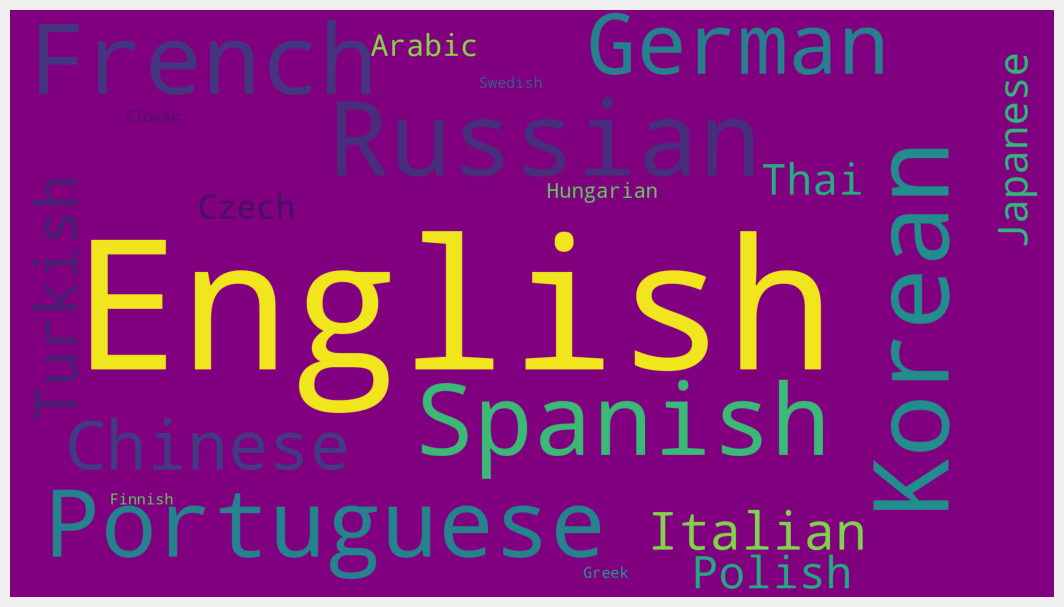

In [13]:
from wordcloud import WordCloud
plt.subplots(figsize=(12,8))
wordcloud = WordCloud(
                          background_color='Purple',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.Language))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

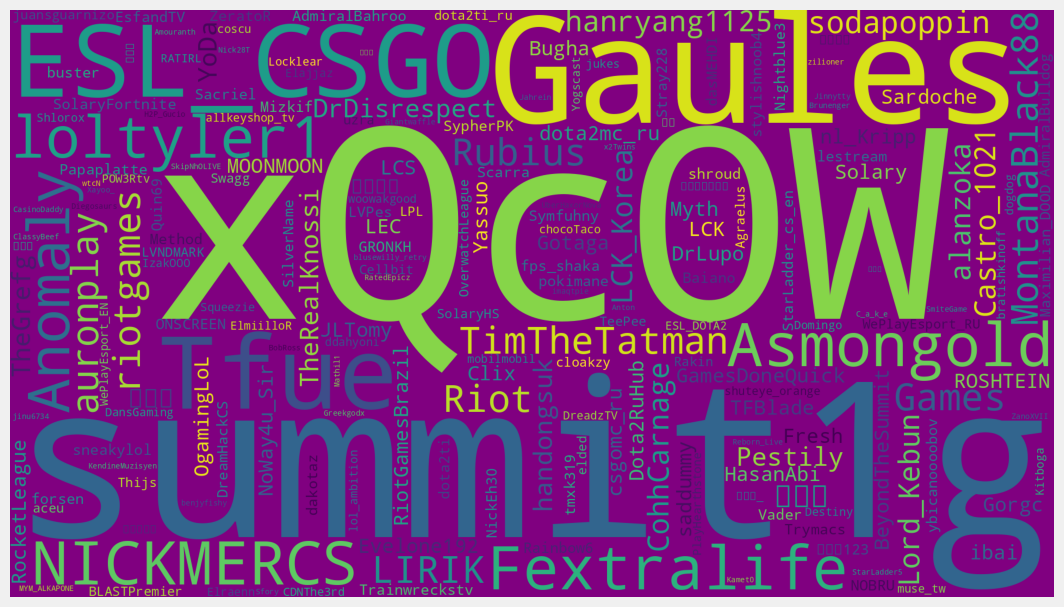

In [14]:
from wordcloud import WordCloud
plt.subplots(figsize=(12,8))
wordcloud = WordCloud(
                          background_color='Purple',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.Channel))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<div style="background-color:Purple; padding:20px; border-radius:5px;">
    <h1 style="color:white; font-weight:bold; text-align:center;">Asking & Answering Questions </h1>
</div>

## Q1. Compare Streaming Time V/s Followers Gained

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



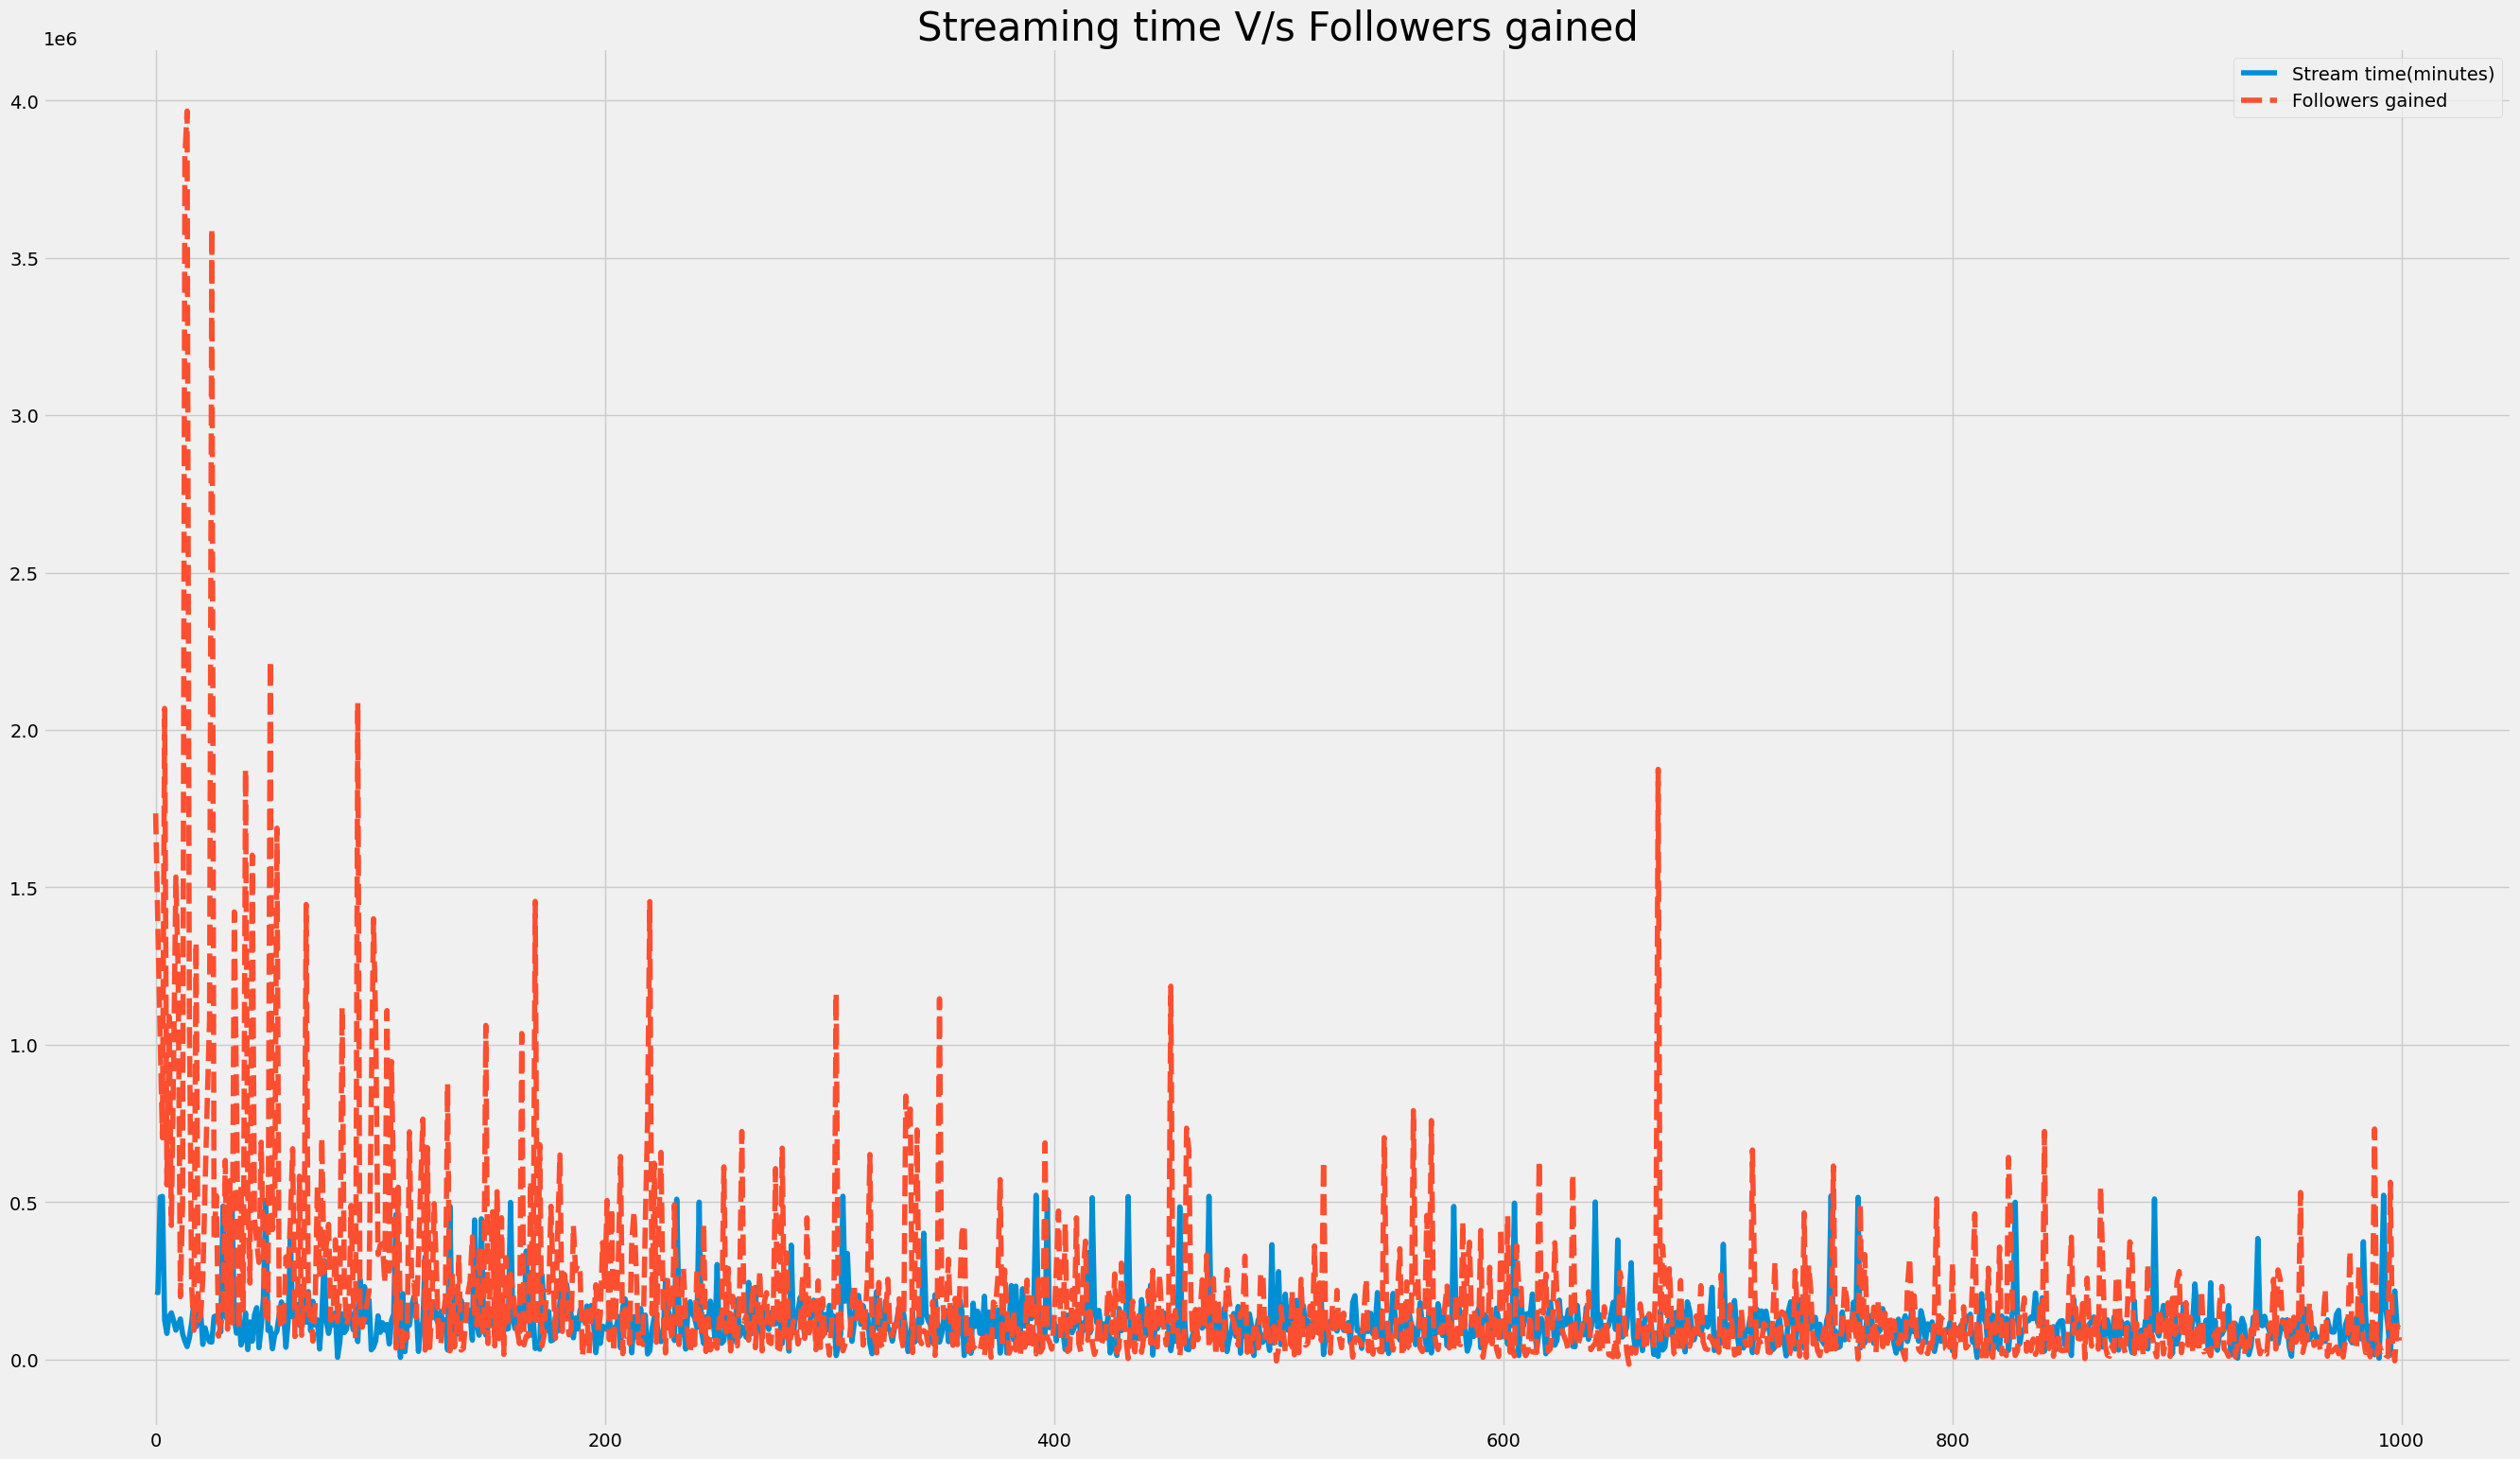

In [15]:
plt.figure(figsize=(30,18)) 
sns.lineplot(data=df[['Stream time(minutes)', 'Followers gained']])
plt.title('Streaming time V/s Followers gained', fontsize = 30)
plt.show()

### From the chart, vast amount of Followers Gained occur towards the Inital Streamer time, and taper downs.

## Q2. Based on the data, Identify which Streamer that had the most Streaming time, the most Watch Time, the number of average viewers, most followers, most viewers Gained.

In [16]:
def streamtime(x): #method to check the streamer that had the most streaming time in our data
    return df.loc[df['Stream time(minutes)']==x]
def watchtime(x): #method to check the streamer that had the most watch time in our data
    return df.loc[df['Watch time(Minutes)']==x]
def avgviewers(x): #method to check the streamer that had the most number of average viewers
    return df.loc[df['Average viewers']==x]
def follow(x): #method to check the streamer that had the most followers in our data
    return df.loc[df['Followers']==x] 
def followgained(x): #method to check the streamer that had the most followers gained in our data
    return df.loc[df['Followers gained']==x] 
def viewgained(x): #method to check the streamer that had the most views gained in our data
    return df.loc[df['Views gained']==x] 

In [17]:
streamtime(df['Stream time(minutes)'].max())

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
392,RiffTrax,293583075,521445,24765,562,79099,17200,3313465,True,False,English


In [18]:
watchtime(df['Watch time(Minutes)'].max())

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English


In [19]:
avgviewers(df['Average viewers'].max())

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
81,dota2ti,1017577605,6315,483530,147643,663297,121422,16228039,True,False,English


In [20]:
follow(df['Followers'].max())

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English


In [21]:
viewgained(df['Views gained'].max())

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
7,Fextralife,3301867485,147885,68795,18985,508816,425468,670137548,True,False,English


### Based on the Results:
- Highest Stream time -> RiffTrax
- Highest Watch time -> xQcOW
- Highest Average viewers -> Dota2ti
- Highest Followers -> Tfue
- HIghest Viewers gained -> Fextralife